<a href="https://colab.research.google.com/github/tensorvijay/Driftscan/blob/master/gaussian_misture_galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
from google.colab import drive



In [ ]:
test_y = np.array([
            np.int64(files_train[galaxy_id].split('/')[-1].split('.')[0])
                    for galaxy_id in range(0,100)]) #test label

In [ ]:
!unzip '/content/drive/My Drive/galaxy/images_training_rev1 (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: images_training_rev1/926426.jpg  
  inflating: images_training_rev1/926435.jpg  
  inflating: images_training_rev1/926446.jpg  
  inflating: images_training_rev1/926448.jpg  
  inflating: images_training_rev1/926453.jpg  
  inflating: images_training_rev1/926462.jpg  
  inflating: images_training_rev1/926478.jpg  
  inflating: images_training_rev1/926480.jpg  
  inflating: images_training_rev1/926484.jpg  
  inflating: images_training_rev1/926488.jpg  
  inflating: images_training_rev1/926509.jpg  
  inflating: images_training_rev1/926522.jpg  
  inflating: images_training_rev1/926544.jpg  
  inflating: images_training_rev1/926547.jpg  
  inflating: images_training_rev1/926548.jpg  
  inflating: images_training_rev1/926551.jpg  
  inflating: images_training_rev1/926602.jpg  
  inflating: images_training_rev1/926630.jpg  
  inflating: images_training_rev1/926649.jpg  
  inflating: images_training_rev1/926655.jpg  
  inflati

In [ ]:
import glob as glob
files_train= glob.glob('../content/images_training_rev1/*.jpg')


In [ ]:
len(files_train)

61578

In [ ]:
files_train[0:10]

['../content/images_training_rev1/730449.jpg',
 '../content/images_training_rev1/910485.jpg',
 '../content/images_training_rev1/373020.jpg',
 '../content/images_training_rev1/290933.jpg',
 '../content/images_training_rev1/578455.jpg',
 '../content/images_training_rev1/989505.jpg',
 '../content/images_training_rev1/804897.jpg',
 '../content/images_training_rev1/445632.jpg',
 '../content/images_training_rev1/967467.jpg',
 '../content/images_training_rev1/844555.jpg']

In [ ]:
test_y = np.array([
            np.int64(files_train[galaxy_id].split('/')[-1].split('.')[0])
                    for galaxy_id in range(len(files_train))]) #test label

In [ ]:
test_y

array([657236, 369038, 470085, ..., 209806, 169790, 604920])

In [ ]:
test_y

array([730449, 910485, 373020, ..., 208787, 164513, 180357])

In [ ]:
def readImage(address):
    x = im.open(address)
    x = np.array(x)
    return(x)

len(files_train)

61578

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.decomposition import PCA

import PIL.Image as im
from sklearn.decomposition import FastICA

from sklearn import mixture

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
image=readImage(files_train[1])

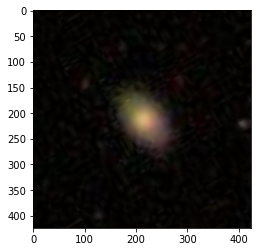

In [ ]:
plt.imshow(image)

In [ ]:
gimage=rgb2gray(image)

In [ ]:
transformer = FastICA(random_state=0,n_components=7)
X_transformed = transformer.fit_transform(gimage)
X_transformed.shape

(424, 7)

In [ ]:
inverse=transformer.inverse_transform(X_transformed)
inverse.shape

(424, 424)

In [ ]:
dpgmm = mixture.BayesianGaussianMixture(n_components=50,
                                        covariance_type='full').fit(gimage)

In [ ]:
dpgmm.covariances_.shape

(50, 424, 424)

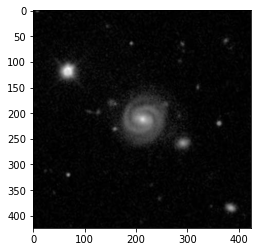

In [ ]:
plt.imshow(gimage,cmap='gray')

In [ ]:
pcatransv=PCA(n_components=0.99)
pcatransm=PCA(n_components='mle')
shapedv=pcatransv.fit_transform(gimage)
shapedm=pcatransm.fit_transform(gimage)
print('variance0.99',shapedv.shape)
print('mle',shapedm.shapedm.shape)

AttributeError: ignored

In [ ]:
pcatransv=PCA(n_components=600,svd_solver='auto')
shapedv=pcatransv.fit_transform(gimage)

ValueError: ignored

In [ ]:
shapedv=pcatransv.fit_transform(gimage)
shapedm=pcatransm.fit_transform(gimage)

In [ ]:
pcatransv.noise_variance_

1.5011036490117784e-05

In [ ]:
pcatransm.noise_variance_

8.905666731575439e-07

In [ ]:
print('variance0.99',shapedv.shape)
print('mle',shapedm.shape)

variance0.99 (424, 84)
mle (424, 196)


In [ ]:
from sklearn.decomposition import PCA
from skimage.color import rgb2gray
import numpy as np

def pcashape(image,thres):
  gim = rgb2gray(image)
  #thresh = threshold_otsu(gim)
  #binary = gim_286947 > thresh
  #plt.imshow(binary,cmap='binary')
  pca=PCA(n_components=thres)
  shaped=pca.fit_transform(gim)
  return np.size(shaped,axis=1)

In [ ]:
resall=np.zeros_like(files_train)
for i in range (len(files_train)):
  image=readImage(files_train[i])
  resall[i]=pcashape(image,0.99)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
np.save('/content/drive/My Drive/galaxy/components.npy',resall)

In [ ]:
resall[20800]

NameError: ignored

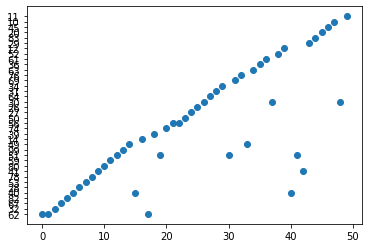

In [ ]:
plt.plot(resall[980:1000],'o',scaley='False')

In [ ]:
recall=np.load('/content/drive/My Drive/galaxy/components.npy')

In [ ]:
recall.shape

(61578,)

In [ ]:
recall[1:10]

array(['51', '59', '40', '32', '42', '56', '17', '45', '58'], dtype='<U42')

In [ ]:
NPcomp=recall.astype('int32')

In [ ]:
S

61578

In [ ]:
NPcomp.dtype

dtype('int32')

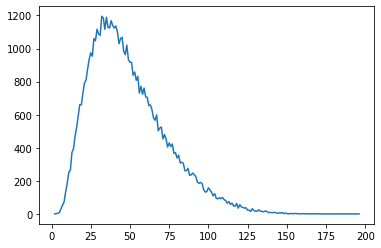

In [ ]:
uniqueValues, occurCount = np.unique(NPcomp, return_counts=True)
plt.plot(uniqueValues,occurCount)

In [ ]:
dist=np.cumsum(occurCount)

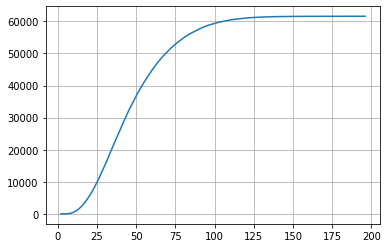

In [ ]:
plt.grid(True)
plt.plot(uniqueValues,dist)

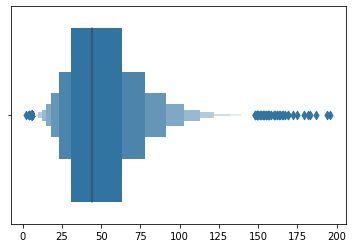

In [ ]:
sns.boxenplot(NPcomp)

In [ ]:
np.median(NPcomp)

44.0

In [ ]:
uniqueValues.shape

(173,)

In [ ]:
S=np.sum(occurCount)
prob=occurCount/S

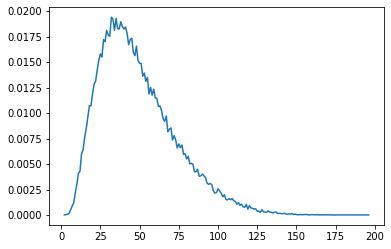

In [ ]:
plt.plot(uniqueValues,prob)

In [ ]:
uniqueValues

array([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       160, 161, 162, 163, 164, 165, 166, 167, 169, 172, 175, 179, 182,
       183, 187, 194, 196], dtype=int32)

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
occurCount=occurCount.reshape(-1,1)

In [ ]:
normfreq=normalize(occurCount)

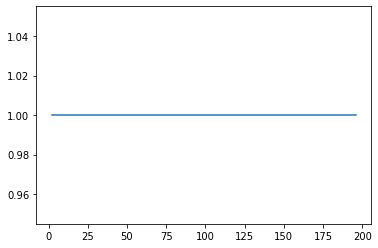

In [ ]:
plt.plot(uniqueValues,normfreq)

In [ ]:

kmeans = KMeans(n_clusters=4, random_state=0).fit(reshape)

In [ ]:
label=kmeans.labels_

In [ ]:
uniqueValues, occurCount = np.unique(label, return_counts=True)

In [ ]:
occurCount

array([20829, 13817, 21647,  5285])

In [ ]:
uniqueValues

array([0, 1, 2, 3], dtype=int32)

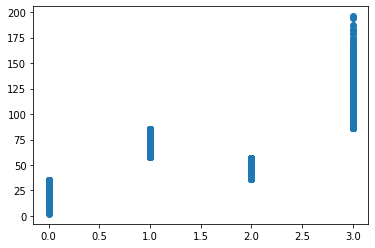

In [ ]:
plt.scatter(label,NPcomp)

In [ ]:
kmeans.cluster_centers_

array([[ 34.03115265],
       [ 73.53847508],
       [129.1167979 ],
       [ 51.77909346],
       [ 16.39851685],
       [ 87.22980719],
       [ 42.8642991 ],
       [ 61.69672688],
       [ 25.71529654],
       [104.11021505]])

In [ ]:
reshape=NPcomp.reshape(-1,1)

In [ ]:
reshape.shape

(61578, 1)

In [ ]:
reshape

array([[93],
       [51],
       [59],
       ...,
       [59],
       [71],
       [28]], dtype=int32)

In [ ]:
frequency,bins=np.histogram(arr)

In [ ]:
special=np.unique(arr)

In [ ]:
special

array([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       160, 161, 162, 163, 164, 165, 166, 167, 169, 172, 175, 179, 182,
       183, 187, 194, 196])

In [ ]:
recall[1].dtype

dtype('<U2')

In [ ]:
arr.shape

(61578,)

In [ ]:
uniqueValues, occurCount = np.unique(arr, return_counts=True)

In [ ]:
np.histogram(uniqueValues,bins=20)

(array([ 9, 10, 10,  9, 10, 10,  9, 10, 10,  9, 10, 10, 10,  9, 10, 10,  8,
         4,  3,  3]),
 array([  2. ,  11.7,  21.4,  31.1,  40.8,  50.5,  60.2,  69.9,  79.6,
         89.3,  99. , 108.7, 118.4, 128.1, 137.8, 147.5, 157.2, 166.9,
        176.6, 186.3, 196. ]))

(array([7.4500e+02, 5.4580e+03, 9.9410e+03, 1.0367e+04, 1.0209e+04,
        7.9490e+03, 5.4200e+03, 4.3180e+03, 2.8950e+03, 1.7450e+03,
        1.1840e+03, 6.9600e+02, 3.4600e+02, 1.6500e+02, 8.3000e+01,
        3.2000e+01, 1.4000e+01, 5.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([  2. ,  11.7,  21.4,  31.1,  40.8,  50.5,  60.2,  69.9,  79.6,
         89.3,  99. , 108.7, 118.4, 128.1, 137.8, 147.5, 157.2, 166.9,
        176.6, 186.3, 196. ]),
 <a list of 20 Patch objects>)

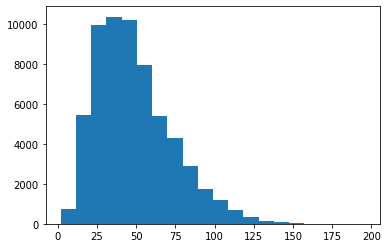

In [ ]:
plt.hist(arr,bins=20)

In [ ]:
occurCount

array([   1,    5,    9,   31,   54,   73,  134,  186,  252,  265,  371,
        395,  470,  523,  591,  661,  660,  731,  791,  810,  877,  935,
        974,  954, 1060, 1047, 1116, 1088, 1080, 1195, 1185, 1116, 1189,
       1127, 1124, 1168, 1139, 1124, 1136, 1100, 1029, 1060, 1068,  983,
        963, 1020,  933,  917,  916,  839,  858,  808,  832,  731,  772,
        724,  761,  708,  705,  656,  659,  631,  581,  567,  599,  503,
        519,  526,  454,  480,  454,  405,  430,  408,  423,  367,  371,
        339,  356,  309,  313,  307,  262,  262,  276,  234,  237,  248,
        238,  226,  193,  186,  191,  184,  146,  133,  136,  159,  145,
        132,  110,  123,   95,   92,   99,   93,  100,   87,   82,   66,
         75,   59,   66,   50,   47,   64,   36,   57,   43,   40,   36,
         38,   23,   24,   16,   33,   20,   18,   17,   26,   18,   17,
         13,   18,   18,   10,   10,    9,    8,   11,    8,    5,    7,
          6,    9,    3,    6,    3,    2,    3,   

In [ ]:
uniqueValues.shape

(173,)

In [ ]:
occurCount.argmax()

29

In [ ]:
uniqueValues[29]

32

In [ ]:
occurCount.max()

1195

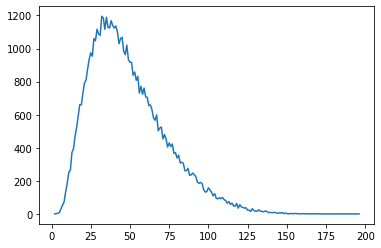

In [ ]:
plt.plot(uniqueValues,occurCount)

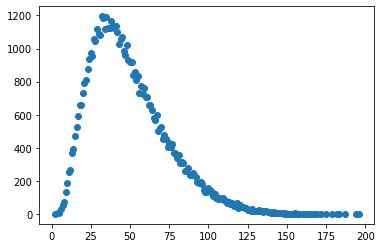

In [ ]:
plt.scatter(uniqueValues,occurCount)

<BarContainer object of 173 artists>

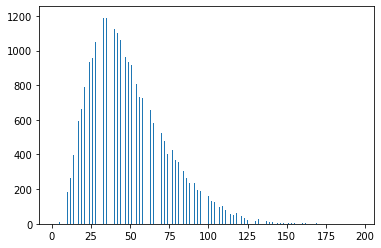

In [ ]:
plt.bar(uniqueValues,occurCount,width=0.24)

In [ ]:
print('min',arr.min())
print('max',arr.max())
print('median',np.median(arr))
print('mean',arr.mean())



min 2
max 196
median 44.0
mean 48.83036149274091


In [ ]:
arr.std()

24.222416336604788

In [ ]:
xaxis=np.linspace(2,8,196)

In [ ]:
import keras
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

import PIL.Image as im

In [ ]:
import pandas as pd

In [ ]:
y_path = '../content/drive/My Drive/galaxy/training_solutions_rev1.csv'

In [ ]:
train_y = pd.read_csv(y_path,index_col='GalaxyID')

In [ ]:
train_y.tail(5)

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
GalaxyID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.0,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.0,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.0,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334
999967,0.767000,0.140000,0.093000,0.000000,0.140000,0.000000,0.140000,0.023380,0.116620,0.000000,0.046620,0.070000,0.023380,0.333000,0.667000,0.069797,0.674193,0.023010,0.00000,0.025641,0.204795,0.025641,0.051282,0.000000,0.025641,0.000000,0.0,0.0,0.023380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.023380


In [ ]:
counter=train_y.T.idxmax()

In [ ]:
counter.value_counts()

Class3.2    13447
Class7.2    11537
Class7.1    10434
Class4.1     6825
Class2.1     6324
Class6.1     6225
Class4.2     1897
Class7.3     1747
Class3.1     1442
Class5.3      869
Class5.2      757
Class5.1       69
Class5.4        5
dtype: int64

In [ ]:
train_y.pop('Class6.2')

GalaxyID
100008    0.945547
100023    0.810851
100053    1.000000
100078    0.679602
100090    0.970617
            ...   
999948    0.754266
999950    0.872356
999958    0.160814
999964    0.136000
999967    0.667000
Name: Class6.2, Length: 61578, dtype: float64

In [ ]:
train_y.pop('Class2.2')

GalaxyID
100008    0.616853
100023    0.632599
100053    0.177352
100078    0.238564
100090    0.000000
            ...   
999948    0.430414
999950    0.098784
999958    0.660414
999964    0.863550
999967    0.140000
Name: Class2.2, Length: 61578, dtype: float64

In [ ]:
train_y = train_y.rename(columns = {"Class5.3": "Class5",
                                  "Class5.2":"Class5",
                                  "Class5.1": "Class5",
                                   "Class5.4": "Class5"})

In [ ]:
Index1=train_y.T.max()
best=Index1[Index1>0.50]
sel1=train_y.loc[best.index]
bestlabel=sel1.T.idxmax()
bestlabel.value_counts()

Class3.2    9868
Class7.1    8149
Class7.2    7813
Class4.1    6386
Class6.1    5548
Class2.1    4923
Class3.1    1202
Class4.2    1133
Class5      1064
Class7.3     575
dtype: int64

In [ ]:
bestlabel.head()

GalaxyID
100008    Class3.2
100023    Class4.1
100053    Class7.2
100122    Class7.2
100123    Class6.1
dtype: object

In [ ]:
bestlabel.shape

(46661,)

In [ ]:
train_y.shape

(61578, 37)

In [ ]:
Index=train_y.T.idxmax()

In [ ]:
numind=train_y.T.max()

In [ ]:
numind.shape

In [ ]:
numind.head(10)

In [ ]:
numind.min()

In [ ]:
Index.head(100)

In [ ]:
traindel=train_y.pop('Class1.1')

In [ ]:
traindel1=train_y.pop('Class1.2')
#traindel2=train_y.pop('Class1.3')

In [ ]:
traindel2=train_y.pop('Class1.3')

In [ ]:
train_y.pop('Class6.1')
train_y.pop('Class6.2')

GalaxyID
100008    0.945547
100023    0.810851
100053    1.000000
100078    0.679602
100090    0.970617
            ...   
999948    0.754266
999950    0.872356
999958    0.160814
999964    0.136000
999967    0.667000
Name: Class6.2, Length: 61578, dtype: float64

In [ ]:
train_y.head()

,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
GalaxyID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100008,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.201463,0.181684,0.000000,0.0,0.027226,0.000000,0.027226,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
100023,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.0,0.236781,0.160941,0.234877,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.000000,0.0,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
100053,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.0,0.117790,0.059562,0.000000,0.000000,0.741864,0.023853,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
100078,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.0,0.000000,0.113284,0.125280,0.408599,0.284778,0.000000,0.0,0.000000,0.096119,0.096119,0.000000,0.128159,0.0,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
100090,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.494587,0.439252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029383,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
train_y.shape

(61578, 33)

In [ ]:
train_y.pop('Class2.2')

GalaxyID
100008    0.616853
100023    0.632599
100053    0.177352
100078    0.238564
100090    0.000000
            ...   
999948    0.430414
999950    0.098784
999958    0.660414
999964    0.863550
999967    0.140000
Name: Class2.2, Length: 61578, dtype: float64

In [ ]:
train_y.pop('Class8.6')
train_y.pop('Class8.1')
train_y.pop('Class8.5')
train_y.pop('Class8.4')
train_y.pop('Class8.7')
train_y.pop('Class8.3')
train_y.pop('Class8.2')
#train_y.pop('Class9.2')

GalaxyID
100008    0.027226
100023    0.000000
100053    0.000000
100078    0.000000
100090    0.000000
            ...   
999948    0.000000
999950    0.000000
999958    0.000000
999964    0.000000
999967    0.025641
Name: Class8.2, Length: 61578, dtype: float64

In [ ]:
newidx=train_y.idxmax(axis=1)

In [ ]:
newidx.value_counts()

Class3.2    15821
Class7.2    12491
Class7.1    11253
Class4.1     7204
Class2.1     6640
Class4.2     2645
Class7.3     1832
Class3.1     1602
Class5.3     1041
Class5.2      828
Class5.1      121
Class1.3       93
Class5.4        7
dtype: int64

In [ ]:
cons=train_y.max(axis=1)

In [ ]:
Index.value_counts()

NameError: ignored

In [ ]:
classes=train_y.T.index

In [ ]:
classes

Index(['Class1.3', 'Class2.1', 'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2',
       'Class5.1', 'Class5.2', 'Class5.3', 'Class5.4', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class9.1', 'Class9.3', 'Class10.1', 'Class10.2',
       'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4',
       'Class11.5', 'Class11.6'],
      dtype='object')

In [ ]:
print(Index)

In [ ]:
Index.tail()

In [ ]:
Index.value_counts()

In [ ]:
Index1=train_y.T.max()

In [ ]:
Index1

In [ ]:
Index1.shape

In [ ]:
best=Index1[Index1>0.50]

In [ ]:
best.shape

In [ ]:
best.head()

In [ ]:
#newin=train_y[best.index]

In [ ]:
sel1=train_y.loc[best.index]

In [ ]:
sel1.shape

In [ ]:
new_data.shape

(61578, 24)

In [ ]:
Index1=train_y.T.max()
best=Index1[Index1>0.40]
sel1=train_y.loc[best.index]
bestlabel=sel1.T.idxmax()
bestlabel.value_counts()
#print('best',bestlabel.shape) #the mainevent

Class3.2    14682
Class7.2    11219
Class7.1    10630
Class4.1     7061
Class2.1     6052
Class4.2     2334
Class5       1775
Class3.1     1488
Class7.3     1244
dtype: int64

In [ ]:
bestlabel.shape

In [ ]:
bestlabel.head()

In [ ]:
new_data = train_y.rename(columns = {"Class5.3": "Class5",
                                  "Class5.2":"Class5",
                                  "Class5.1": "Class5",
                                   "Class5.4": "Class5"})

In [ ]:
train_y=new_data

In [ ]:
bestlabel.value_counts()

In [ ]:
bestlabel.head()

In [ ]:
bestlabel.shape

In [ ]:
best.shape()

In [ ]:
bestlabel=sel1.T.idxmax()

In [ ]:
bestlabel.shape

In [ ]:
bestlabel.head(10)

In [ ]:
bestlabel.value_counts()

In [ ]:
count

In [ ]:
galid=best.index

In [ ]:
galid

In [ ]:
best.head()

In [ ]:
best.unique

In [ ]:
cla_best=best[]

In [ ]:
cla_best

In [ ]:
best.shape

In [ ]:
best.head()

In [ ]:
galid=best.index

In [ ]:
bestvalue=Index[galid]

In [ ]:
bestvalue.head()

In [ ]:
colinc=train_y[]

In [ ]:
best.head(100)

In [ ]:
Num=np.asanyarray(Index1)

In [ ]:
train_y.plot(table='true')

In [ ]:
Index1.loc(1:100).plot(x='GalaxyID',style='o',figsize=(25, 25))

In [ ]:
!pip install astronn

In [ ]:
from keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

#from astroNN.models import Galaxy10CNN
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = galaxy10.load_data()


In [ ]:
images.shape

In [ ]:
labels.shape

In [ ]:
labels

In [ ]:
img1=images[13,:,:,:]

In [ ]:
plt.imshow(img1)

In [ ]:
Num

In [ ]:
plt.plot(Num.T)

In [ ]:
train_y.plot()

In [ ]:
train = np.array([readImage(files_train[x_train])
                  for x_train in range(30)
                 ])

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train[29,:,:,:])

In [ ]:
img=train[29,:,:,:]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture


In [ ]:
img.shape

In [ ]:
img1=img[:,:,0]
plt.imshow(img1)

In [ ]:
img2=img[:,:,2]

In [ ]:
plt.imshow(img1)

In [ ]:

gmm = GaussianMixture(n_components=5)
gmm.fit(img1)

In [ ]:

M=gmm.means_
C=gmm.covariances_

In [ ]:
M.shape

In [ ]:
C.shape

In [ ]:
P=gmm.predict_proba(img1)

In [ ]:
P.shape

In [ ]:
img1.shape

In [ ]:
M.shape

In [ ]:
M.shape

In [ ]:
plt.plot(M[0,:])

In [ ]:
plt.plot(M[3,:])

In [ ]:
C.shape

In [ ]:
plt.imshow(C[1,:,:])

In [ ]:
gmm.score(img2)

In [ ]:
F=gmm.sample()

In [ ]:
F[1]

In [ ]:
K=np.asarray(F[0])

In [ ]:
K.shape

In [ ]:
plt.plot(K[0])

In [ ]:
img1.shape

In [ ]:
plt.plot(img1[1])

In [ ]:
H=np.histogram(img1)

In [ ]:
H[1].shape

In [ ]:
plt.plot(H[0])

In [ ]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [ ]:
bins

In [ ]:
img3=img[:,:,2]
img2=img[:,:,1]
img1=img[:,:,0]

In [ ]:
predict=gmm.score_samples(img2)
plt.plot(predict)

In [ ]:
predict=gmm.score_samples(img2)
plt.plot(predict)

In [ ]:
predict=gmm.score_samples(img1)
plt.plot(predict)

In [ ]:
X, Y = np.meshgrid(np.linspace(-1, 1), np.linspace(-1,1))

In [ ]:
img.shape

In [ ]:
X.shape

In [ ]:
XX = np.array([X.ravel(), Y.ravel()]).T

In [ ]:
XX.shape

In [ ]:
img1.shape

In [ ]:
from sklearn.decomposition import PCA



In [ ]:
plt.imshow(img1)

In [ ]:
pca = PCA(n_components=28)
res=pca.fit(img1)
img1_t=pca.transform(img1)
X_new = pca.inverse_transform(img1_t)
plt.imshow(X_new)

In [ ]:
imgex1=train[28,:,:,:]

In [ ]:
from skimage.color import rgb2gray

grayscale = rgb2gray(imgex1)

In [ ]:
plt.imshow(grayscale,cmap='gray')

In [ ]:
plt.imshow(imgex1)

In [ ]:
climgex1_0=imgex1[:,:,0]

In [ ]:
plt.imshow(imgex1_0)

In [ ]:
pca = PCA(n_components=28)
res=pca.fit(imgex1_0)
img1ex1_t=pca.transform(imgex1_0)
X_newex = pca.inverse_transform(img1ex1_t)
plt.imshow(X_newex)

In [ ]:
img1ex1_t.shape

In [ ]:
pinvex=np.linalg.pinv(img1ex1_t)

In [ ]:
recexc=np.dot(pinvex.T,red_im)

In [ ]:
X_newex = pca.inverse_transform(recexc)
plt.imshow(X_newex)

In [ ]:
img1ex1_t

In [ ]:
img1.nbytes-img1_t.nbytes

In [ ]:
img1_t.shape

In [ ]:
print(img1_t)

In [ ]:
red_im=np.dot(img1_t.T,img1_t)

In [ ]:
red_im.shape

In [ ]:
inv=np.linalg.inv(red_im)

In [ ]:
pinv=np.linalg.pinv(img1_t)

In [ ]:
pinv.shape

In [ ]:
pinv.T-img1_t

In [ ]:
inv.shape

In [ ]:
rec=np.dot(pinv.T,red_im)

In [ ]:
rec1=np.dot(img1_t,red_im)

In [ ]:
rec1.shape

In [ ]:
ex1=pca.inverse_transform(pinv.T)
plt.imshow(ex1)

In [ ]:
X_rec1 = pca.inverse_transform(rec1)
plt.imshow(X_rec1)

In [ ]:
rec.shape

In [ ]:
rec.shape

In [ ]:
X_rec = pca.inverse_transform(rec)
plt.imshow(X_rec)

In [ ]:
u,s,vh=np.linalg.svd(img1)

In [ ]:
u.shape

In [ ]:
plt.imshow(vh)

In [ ]:
s.shape

In [ ]:
s=s.reshape(53,8)

In [ ]:
s.shape

In [ ]:
vh.shape

In [ ]:
rec.

In [ ]:
red_im.nbytes-img1.nbytes

In [ ]:
inv=

In [ ]:
red_im.astype('float64')

In [ ]:
print(red_im.astype('float64'))

In [ ]:
plt.imshow(red_im)

In [ ]:
pca = PCA(n_components=2)
res=pca.fit(img1)
img1_t=pca.transform(img1)
X_new = pca.inverse_transform(img1_t)
plt.imshow(X_new)

In [ ]:
img1_t.shape

In [ ]:
X_train = img1_t

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [ ]:
x = np.linspace(-20., 30)

In [ ]:
len(x)

In [ ]:
XX.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [ ]:
X_train.shape

In [ ]:
XX.shape

In [ ]:
print(res)

In [ ]:
pca.components_.shape

In [ ]:
img1.nbytes-img1_t.nbytes

In [ ]:
img1_t=img1_t.T

In [ ]:
plt.plot(img1_t[11])

In [ ]:
pca.noise_variance_

In [ ]:
img1.nbytes

In [ ]:
img1.nbytes-res.components_.nbytes

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.noise_variance_

In [ ]:
np.size(X_new.data)

In [ ]:
res=pca.fit(img1)

In [ ]:
X_new.nbytes

In [ ]:
img1.nbytes

In [ ]:
compoenents=pca.components_

In [ ]:
len(compoenents)

In [ ]:
compoenents.shape

In [ ]:
plt.plot(compoenents[1])

In [ ]:
img1_t=pca.transform(img1)

In [ ]:
plt.plot(im[0])

In [ ]:
im=img1_t.T

In [ ]:
im.shape

In [ ]:

X_new = pca.inverse_transform(img1_t)

In [ ]:
X_new

In [ ]:
plt.imshow(X_new)

In [ ]:
W=gmm.weights_

In [ ]:
W.shape

In [ ]:
print(W)